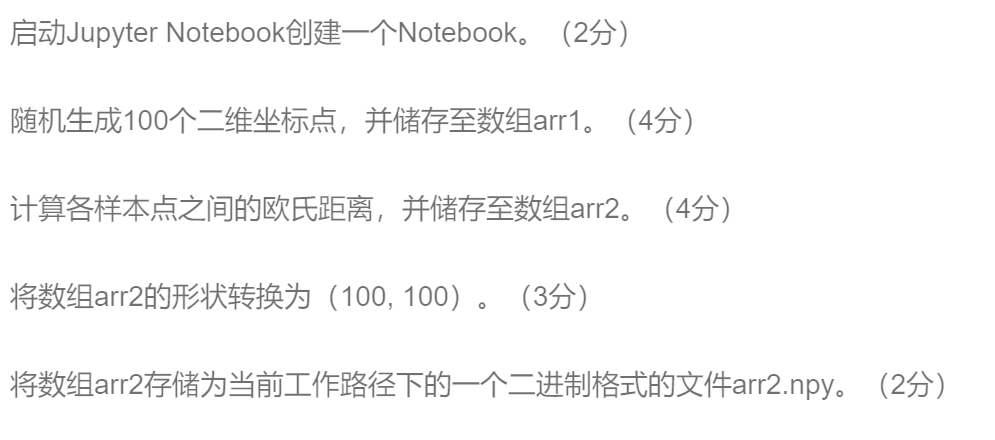

In [12]:
import numpy as np
import numpy.random as rd
import math

# 第1小题

# 第2小提：创建arr1
x=rd.randint(1,9,100)
y=rd.randint(1,9,100)
arr1=np.array([x,y]).T
# arr1.shape

# 第3小题：计算欧氏距离
arr2=[]
for i in range(len(arr1)):
    for j in range(len(arr1)):
        x2=(arr1[i,0]-arr1[j,0])**2
        y2=(arr1[i,1]-arr1[j,1])**2
        el=math.sqrt(x2+y2)
        arr2.append(el)
arr2=np.array(arr2)
# arr2.size

# 第4小题：变换arr2的形态
arr2=arr2.reshape(100,100)
arr2.shape

# 第5小题：保存数据
np.save('arr2.npy',arr2)
# np.load('arr2.npy').size

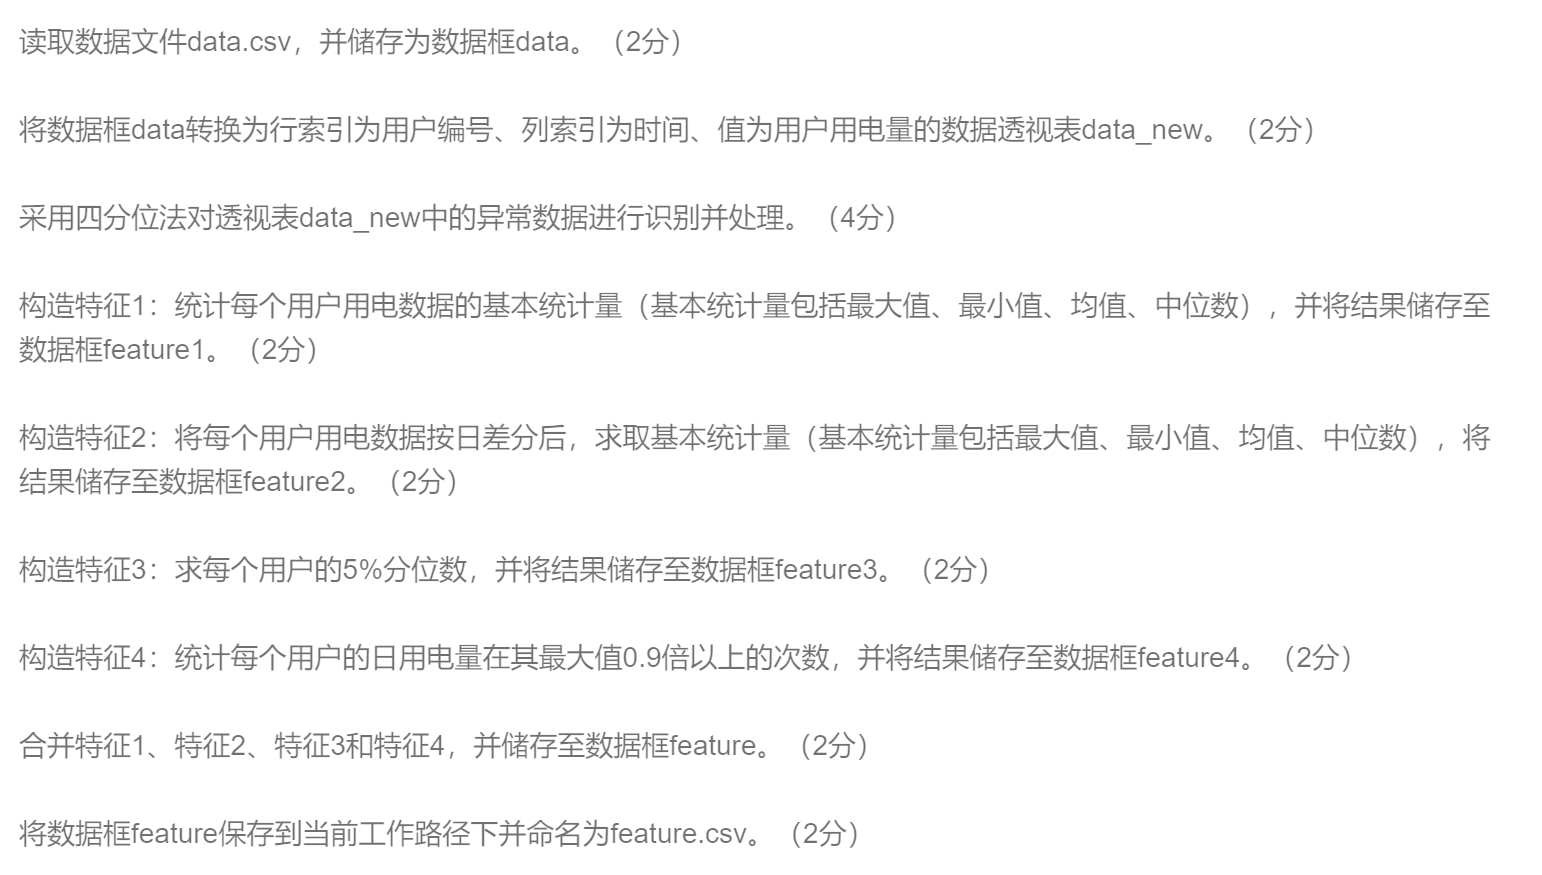

In [27]:
import pandas as pd

# 第1小题：读取数据
data=pd.read_csv('data.csv')
# data.head()

# 第2小题：创建透视表
data_new=pd.pivot_table(data,values='KWH',index='CONS_NO',columns='DATA_DATE')

# 第3小题：四分位法处理异常数据
def clear_(x=None):
    qu=x.quantile(0.75) # 上四分位
    ql=x.quantile(0.25) # 下四分位
    iqr=qu-ql # 四分位距
    x[((x>qu+1.5*iqr)|(x<ql-1.5*iqr))]=None
    return x
data_new.apply(clear_,axis=0)

# 第4小题：构造特征1
feature1=data_new.agg(['max','min','mean','median'],axis=1)

# 第5小题：构造特征2(diff()默认向下平移取差值)
feature2=data_new.diff(axis=1).agg(['max','min','mean','median'],axis=1)

# 第6小题：构造特征3
feature3=data_new.quantile(0.05,axis=1)

# 第7小题：构造特征4
feature4=data_new.apply(lambda x:sum(x > x.max()*0.9),axis=1)

# 第8小题：合并特征
feature=pd.concat([feature1,feature2,feature3,feature4],axis=0)

# 第9小题：保存数据
feature.to_csv('feature.csv')
# pd.read_csv('feature.csv')

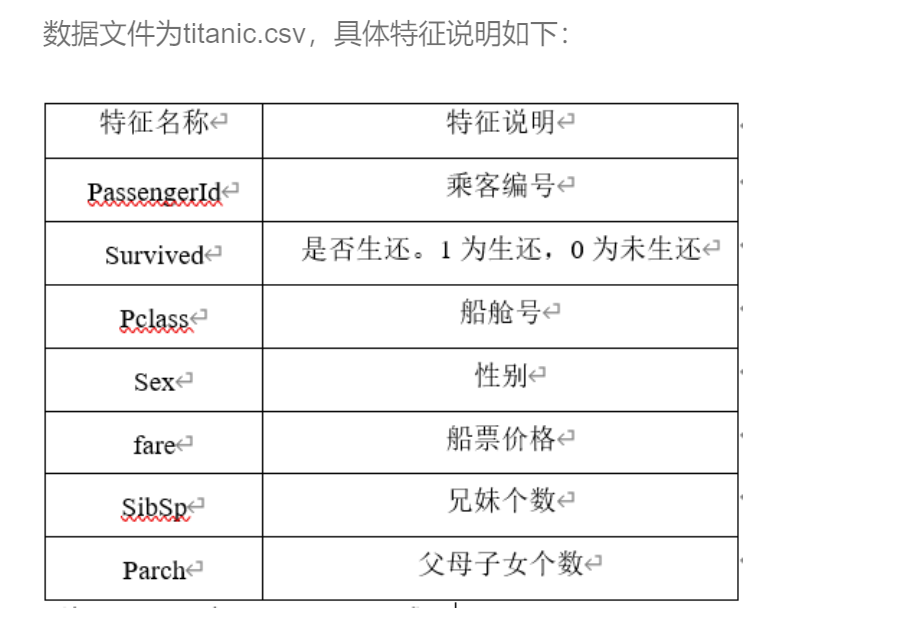

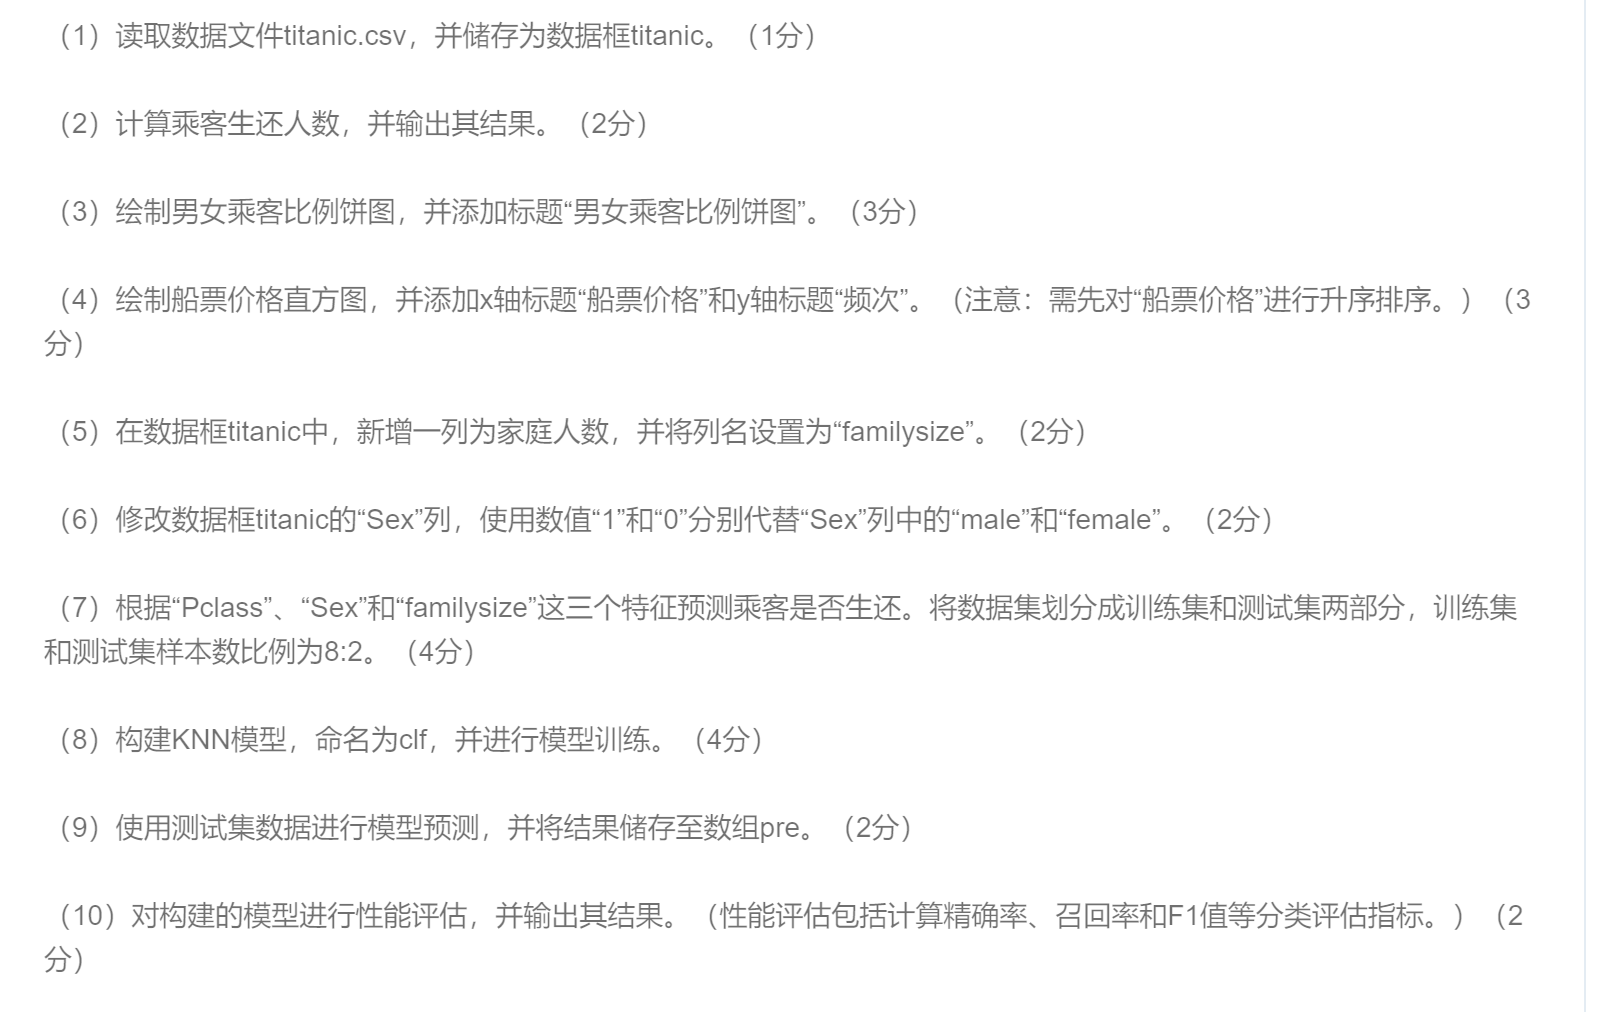

342


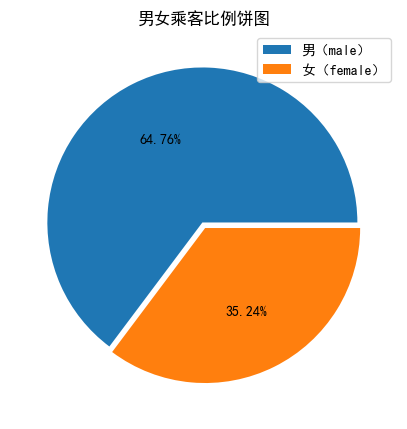

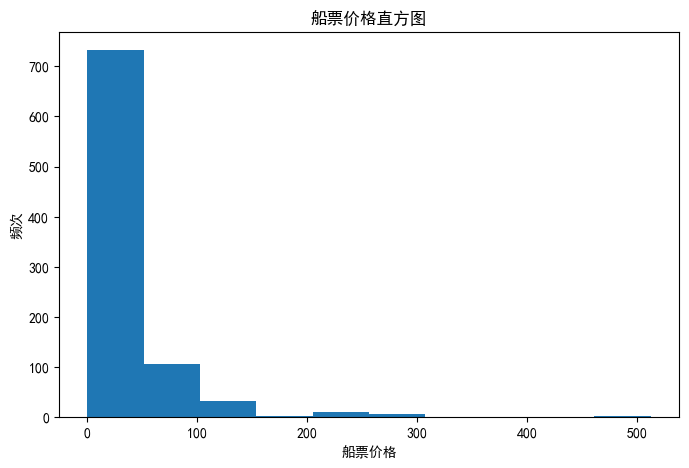

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       104

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 第1小题：读取数据
tianic=pd.read_csv('titanic.csv')
# tianic.head()

# 第2小题：计算生还人数
print(tianic[tianic['Survived']==1]['PassengerId'].count())

# 第3小题：绘制男女比例饼图
data=[tianic['Sex'].value_counts()['male'],tianic['Sex'].value_counts()['female']]
plt.figure(figsize=(5,8))
plt.rcParams['font.sans-serif']='SimHei'
plt.title('男女乘客比例饼图')
plt.pie(data,explode=[0.02,0.02],autopct='%.2f%%')
plt.legend(['男（male）','女（female）'])
plt.show()

# 第4小题：绘制直方图
plt.figure(figsize=(8,5))
data=tianic['fare'].sort_values()
plt.title('船票价格直方图')
plt.xlabel('船票价格')
plt.ylabel('频次')
plt.hist(data)
plt.show()

# 第5小题：增加familysize列
tianic['familysize']=tianic.loc[:,'SibSp']+tianic.loc[:,'Parch']
# tianic.head(),(tianic.loc[:,'SibSp']+tianic.loc[:,'Parch']).head()

# 第6小题：修改Sex数据
tianic[tianic['Sex']=='male']=1
tianic[tianic['Sex']=='female']=0
# tianic

# 第7小题；分割数据
x=tianic.loc[:,['Pclass','Sex','familysize']]
y=tianic.loc[:,'Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# 第8小题：构建/训练模型
KNN=KNeighborsClassifier(n_neighbors=20)
KNN.fit(x_train,y_train)

# 第9小题：预测数据
pre=KNN.predict(x_test)

# 第10小题：评估模型
print(classification_report(y_test,pre))